In [2]:
# import library

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam


In [3]:
labels = ['batik-garutan', 'batik-lain']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
# Now we can easily fetch our train and validation data.

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
train = get_data('/content/gdrive/MyDrive/Colab Notebooks/skripsi/datasetv3/train')
val = get_data('/content/gdrive/MyDrive/Colab Notebooks/skripsi/datasetv3/validation')

Mounted at /content/gdrive
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [6]:
print(train.shape)
print(train)

(816, 2)
[[array([[[252, 253, 247],
          [230, 242, 228],
          [235, 242, 224],
          ...,
          [  0,  51,  64],
          [203, 212, 207],
          [ 78, 140, 159]],

         [[229, 234, 214],
          [218, 229, 211],
          [227, 239, 214],
          ...,
          [ 81, 133, 121],
          [109, 131, 130],
          [182, 206, 214]],

         [[182, 158, 140],
          [214, 229, 213],
          [226, 244, 224],
          ...,
          [174, 187, 161],
          [126, 199, 198],
          [174, 187, 188]],

         ...,

         [[ 26,  49,  85],
          [ 29,  32,  81],
          [240, 250, 243],
          ...,
          [176, 188, 180],
          [167, 187, 191],
          [131, 109,  80]],

         [[ 14,  48,  85],
          [ 27,  39,  83],
          [157, 178, 197],
          ...,
          [106, 158, 181],
          [ 32, 105, 142],
          [153, 156, 128]],

         [[ 26,  49,  91],
          [ 22,  41,  81],
          [ 20,  32,  83],


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


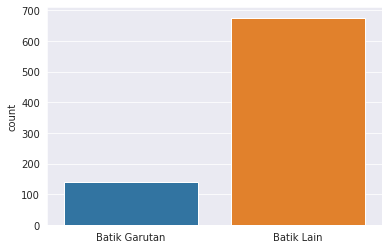

In [13]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Batik Garutan")
    else:
        l.append("Batik Lain")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'batik-garutan')

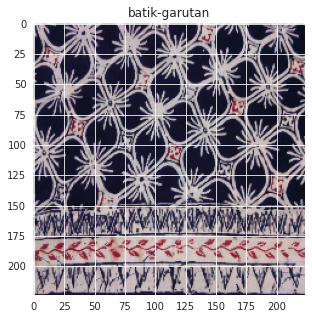

In [17]:
plt.figure(figsize = (5,5))
plt.imshow(train[4][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'batik-lain')

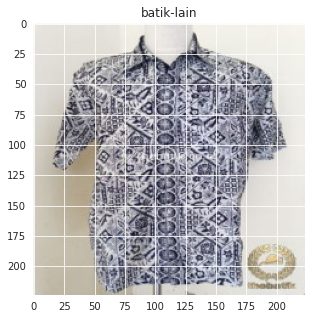

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [10]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [12]:
print(x_train)

[[[[0.98823529 0.99215686 0.96862745]
   [0.90196078 0.94901961 0.89411765]
   [0.92156863 0.94901961 0.87843137]
   ...
   [0.         0.2        0.25098039]
   [0.79607843 0.83137255 0.81176471]
   [0.30588235 0.54901961 0.62352941]]

  [[0.89803922 0.91764706 0.83921569]
   [0.85490196 0.89803922 0.82745098]
   [0.89019608 0.9372549  0.83921569]
   ...
   [0.31764706 0.52156863 0.4745098 ]
   [0.42745098 0.51372549 0.50980392]
   [0.71372549 0.80784314 0.83921569]]

  [[0.71372549 0.61960784 0.54901961]
   [0.83921569 0.89803922 0.83529412]
   [0.88627451 0.95686275 0.87843137]
   ...
   [0.68235294 0.73333333 0.63137255]
   [0.49411765 0.78039216 0.77647059]
   [0.68235294 0.73333333 0.7372549 ]]

  ...

  [[0.10196078 0.19215686 0.33333333]
   [0.11372549 0.1254902  0.31764706]
   [0.94117647 0.98039216 0.95294118]
   ...
   [0.69019608 0.7372549  0.70588235]
   [0.65490196 0.73333333 0.74901961]
   [0.51372549 0.42745098 0.31372549]]

  [[0.05490196 0.18823529 0.33333333]
   [0.1

In [ ]:
datagen = ImageDataGenerator(
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip=True,
    rotation_range=90)


datagen.fit(x_train)

In [ ]:

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224,224,3),
    pooling='max',
    # classes=2,
    weights='imagenet'
    )

pretrained_model.trainable=False



94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model = Sequential()

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
base_learning_rate = 0.00001

# resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
resnet_model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

history = resnet_model.fit(x_train,y_train,epochs = 100, validation_data = (x_val, y_val))

Epoch 1/100
7/7 [==============================] - 54s 8s/step - loss: 2.2136 - accuracy: 0.5000 - val_loss: 3.1716 - val_accuracy: 0.1667
Epoch 2/100
7/7 [==============================] - 47s 7s/step - loss: 1.6129 - accuracy: 0.5000 - val_loss: 2.1554 - val_accuracy: 0.1667
Epoch 3/100
7/7 [==============================] - 48s 7s/step - loss: 1.1001 - accuracy: 0.5000 - val_loss: 1.3079 - val_accuracy: 0.1800
Epoch 4/100
7/7 [==============================] - 47s 7s/step - loss: 0.7727 - accuracy: 0.4950 - val_loss: 0.8075 - val_accuracy: 0.3867
Epoch 5/100
7/7 [==============================] - 48s 7s/step - loss: 0.7032 - accuracy: 0.5350 - val_loss: 0.6093 - val_accuracy: 0.6933
Epoch 6/100
7/7 [==============================] - 47s 7s/step - loss: 0.7146 - accuracy: 0.5300 - val_loss: 0.5846 - val_accuracy: 0.7467
Epoch 7/100
7/7 [==============================] - 48s 7s/step - loss: 0.7022 - accuracy: 0.5500 - val_loss: 0.6317 - val_accuracy: 0.6667
Epoch 8/100
7/7 [==========

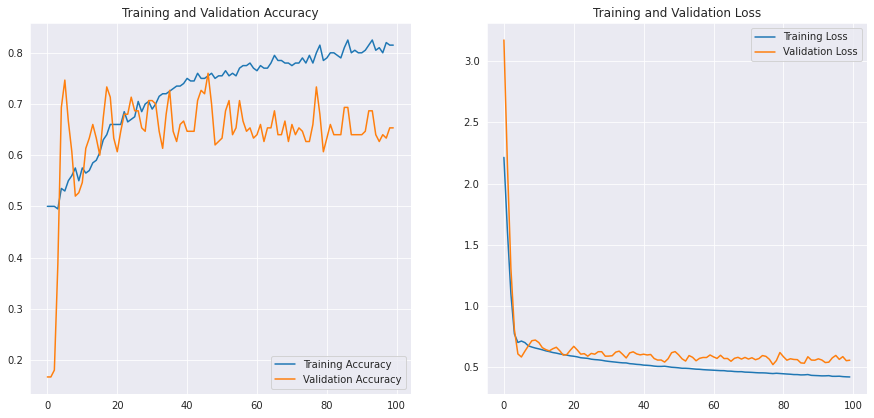

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
p_pred = resnet_model.predict(x_val)
p_pred = p_pred.reshape(1,-1)[0]
# p_pred = p_pred.flatten()
# print(p_pred.round(2))

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names = ['Batik Garutan','Batik Lain']))


[[79 46]
 [ 6 19]]
               precision    recall  f1-score   support

Batik Garutan       0.93      0.63      0.75       125
   Batik Lain       0.29      0.76      0.42        25

     accuracy                           0.65       150
    macro avg       0.61      0.70      0.59       150
 weighted avg       0.82      0.65      0.70       150

